In [60]:
import numpy as np
import pandas as pd
from skimage import io
import cv2
import random
import os
import shutil

import matplotlib.pyplot as plt

In [61]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [62]:
dataset=pd.read_csv('/content/gdrive/MyDrive/Facial map/training.csv')

In [63]:
dataset.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [65]:
dataset.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [66]:
def get_non_null(dataset):

    #this function removes the rows with null values

    dataset = dataset[np.sum(dataset.isna(), axis=1) == 0].reset_index()
    return dataset

In [67]:
def get_image_path(dataset):

    #this function adds new column with the image path and returns the dataset after adding

    dataset['image_path'] = [str(x) + '.jpg' for x in range(dataset.shape[0])]
    train_images_path = ('/content/gdrive/MyDrive/Facial map/images/train_images')
    dataset['image_path'] = (train_images_path + '/' + dataset['image_path'])
    return dataset

In [51]:
def get_classes_coord(dataset):

    #this function merges the point x coordinate with y of the dataset and returns the dataset after merge

    col_points_x = [dataset.columns[i] for i in range(1, len(dataset.columns)-1, 2)]
    col_points_y = [dataset.columns[i] for i in range(2, len(dataset.columns)-1, 2)]
    new_cols_names = [col_points_x[i].split('_x')[0] for i in range(len(col_points_x))]
    for x in range(len(new_cols_names)):
        dataset[new_cols_names[x]] = [[dataset[col_points_x[x]][i], dataset[col_points_y[x]][i]] for i in range(len(dataset))]
    return pd.concat([dataset[new_cols_names], dataset['image_path']], axis=1)

In [68]:
dataset_non_null   = get_non_null(dataset.copy())
# dataset_non_null.insert(1, 'class', 0)
# dataset_non_null.drop('index', axis = 1, inplace = True)
# dataset_non_null['class'] = np.uint8(dataset_non_null['class'])

dataset_with_paths = get_image_path(dataset_non_null.copy())
train_dataset      = get_classes_coord(dataset_with_paths)
train_dataset.head()

,left_eye_center,right_eye_center,left_eye_inner_corner,left_eye_outer_corner,right_eye_inner_corner,right_eye_outer_corner,left_eyebrow_inner_end,left_eyebrow_outer_end,right_eyebrow_inner_end,right_eyebrow_outer_end,nose_tip,mouth_left_corner,mouth_right_corner,mouth_center_top_lip,mouth_center_bottom_lip,image_path
0,"[66.0335639098, 39.0022736842]","[30.2270075188, 36.4216781955]","[59.582075188, 39.6474225564]","[73.1303458647, 39.9699969925]","[36.3565714286, 37.3894015038]","[23.4528721805, 37.3894015038]","[56.9532631579, 29.0336481203]","[80.2271278195, 32.2281383459]","[40.2276090226, 29.0023218045]","[16.3563789474, 29.6474706767]","[44.4205714286, 57.0668030075]","[61.1953082707, 79.9701654135]","[28.6144962406, 77.3889924812]","[43.3126015038, 72.9354586466]","[43.1307067669, 84.4857744361]",/content/gdrive/MyDrive/Facial map/images/trai...
1,"[64.3329361702, 34.9700765957]","[29.9492765957, 33.4487148936]","[58.8561702128, 35.2743489362]","[70.7227234043, 36.1871659574]","[36.0347234043, 34.3615319149]","[24.4725106383, 33.1444425532]","[53.9874042553, 28.2759489362]","[78.634212766, 30.4059234043]","[42.7288510638, 26.1460425532]","[16.8653617021, 27.0588595745]","[48.2062978723, 55.6609361702]","[56.4214468085, 76.352]","[35.1223829787, 76.0476595745]","[46.6845957447, 70.2665531915]","[45.4679148936, 85.4801702128]",/content/gdrive/MyDrive/Facial map/images/trai...
2,"[65.0570526316, 34.9096421053]","[30.9037894737, 34.9096421053]","[59.412, 36.3209684211]","[70.9844210526, 36.3209684211]","[37.6781052632, 36.3209684211]","[24.9764210526, 36.6032210526]","[55.7425263158, 27.5709473684]","[78.8873684211, 32.6516210526]","[42.1938947368, 28.1354526316]","[16.7911578947, 32.0871157895]","[47.5572631579, 53.5389473684]","[60.8229473684, 73.0143157895]","[33.7263157895, 72.732]","[47.2749473684, 70.1917894737]","[47.2749473684, 78.6593684211]",/content/gdrive/MyDrive/Facial map/images/trai...
3,"[65.2257391304, 37.261773913]","[32.0230956522, 37.261773913]","[60.0033391304, 39.1271791304]","[72.3147130435, 38.3809669565]","[37.6186434783, 38.7541147826]","[25.3072695652, 38.0079026087]","[56.4338086957, 30.9298643478]","[77.9102608696, 31.6657252174]","[41.6715130435, 31.0499895652]","[20.4580173913, 29.9093426087]","[51.8850782609, 54.1665391304]","[65.5988869565, 72.7037217391]","[37.2454956522, 74.1954782609]","[50.3031652174, 70.0916869565]","[51.5611826087, 78.2683826087]",/content/gdrive/MyDrive/Facial map/images/trai...
4,"[66.7253006135, 39.6212613497]","[32.244809816, 38.0420319018]","[58.5658895706, 39.6212613497]","[72.5159263804, 39.8844662577]","[36.9823803681, 39.0948515337]","[22.5061104294, 38.3052368098]","[57.2495705521, 30.6721766871]","[77.7629447853, 31.7372466258]","[38.0354355828, 30.9353815951]","[15.9258699387, 30.6721766871]","[43.2995337423, 64.8895214724]","[60.6714110429, 77.5232392638]","[31.1917546012, 76.9973006135]","[44.9627484663, 73.7073865031]","[44.2271411043, 86.8711656442]",/content/gdrive/MyDrive/Facial map/images/trai...


#plotting dataset

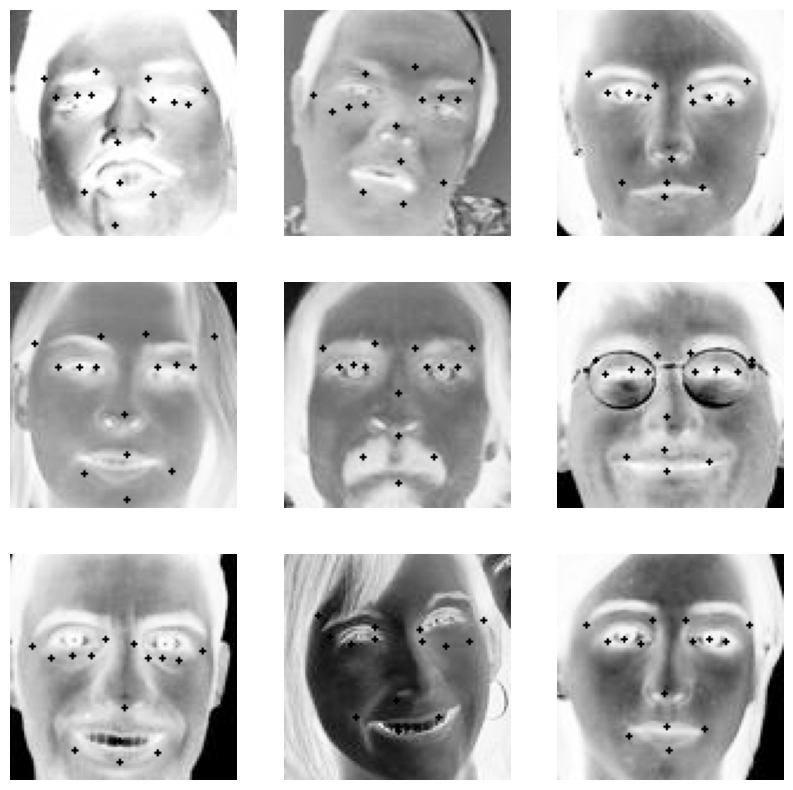

In [69]:
plt.figure(figsize = (10,10))
for plot_index in range(9):
    index  = random.randint(0, len(train_dataset) - 1)
    image  = io.imread(train_dataset['image_path'][index],1)
    points = train_dataset.loc[index][:-1]
    points = [np.uint(points[x]) for x in range(len(points))]
    for point_index in range(len(points)):
        image = cv2.circle(image, points[point_index] , radius=1, color=1, thickness=-1)
    plt.subplot(3,3, plot_index + 1)
    plt.imshow(image, cmap='Greys')
    plt.axis('off')

In [70]:
train_dataset.columns

Index(['left_eye_center', 'right_eye_center', 'left_eye_inner_corner',
       'left_eye_outer_corner', 'right_eye_inner_corner',
       'right_eye_outer_corner', 'left_eyebrow_inner_end',
       'left_eyebrow_outer_end', 'right_eyebrow_inner_end',
       'right_eyebrow_outer_end', 'nose_tip', 'mouth_left_corner',
       'mouth_right_corner', 'mouth_center_top_lip', 'mouth_center_bottom_lip',
       'image_path'],
      dtype='object')

In [72]:
os.mkdir('datam')
os.mkdir('datam/images')
os.mkdir('datam/labels')
os.mkdir('datam/images/train')
os.mkdir('datam/images/val')
os.mkdir('datam/labels/train')
os.mkdir('datam/labels/val')

In [73]:
# split into train and val
for index in range(len(train_dataset) - 200):
    file_name = os.path.split(train_dataset.loc[index]['image_path'])[1].split('.')[0]
    inst_data = [0, 0.5,0.5,0.5,0.5]
    label_path = os.path.join('/content/datam/labels/train', (file_name + '.txt'))
    image_path = os.path.join('/content/datam/images/train', (file_name + '.jpg'))
    slc = train_dataset.iloc[index].to_numpy(copy=True)[:-1]
    for i in range(15):
        inst_data.extend([slc[i][0]/96, slc[i][1]/96])
    np.array(inst_data,dtype = object).tofile(f'{label_path}', sep=' ')
    shutil.copyfile(train_dataset.loc[index]['image_path'], image_path)

In [74]:
for index in range((len(train_dataset) - 200), len(train_dataset)):
    file_name = os.path.split(train_dataset.loc[index]['image_path'])[1].split('.')[0]
    inst_data = [0, 0.5,0.5,0.5,0.5]
    label_path = os.path.join('/content/datam/labels/val', (file_name + '.txt'))
    image_path = os.path.join('/content/datam/images/val', (file_name + '.jpg'))
    slc = train_dataset.iloc[index].to_numpy(copy=True)[:-1]
    for i in range(15):
        inst_data.extend([slc[i][0]/96, slc[i][1]/96])
    np.array(inst_data,dtype = object).tofile(f'{label_path}', sep=' ')
    shutil.copyfile(train_dataset.loc[index]['image_path'], image_path)

In [75]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 8.6 MB/s eta 0:00:00


In [76]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-pose.pt')  # load an official model



100%|██████████| 6.51M/6.51M [00:00<00:00, 71.3MB/s]


In [77]:
# Predict with the model
results = model('/content/gdrive/MyDrive/Facial map/images/test_images/1.jpg')  # predict on an image


image 1/1 /content/gdrive/MyDrive/Facial map/images/test_images/1.jpg: 640x640 1 person, 13.3ms
Speed: 14.6ms preprocess, 13.3ms inference, 58.8ms postprocess per image at shape (1, 3, 640, 640)


In [80]:

results = model.train(data='data.yaml', epochs=10, imgsz=640)

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, i

train: Scanning /content/datam/labels/train... 1940 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1940/1940 [00:01<00:00, 1508.25it/s]


train: New cache created: /content/datam/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datam/labels/val... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 547.10it/s]

val: New cache created: /content/datam/labels/val.cache


Plotting labels to runs/pose/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/pose/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.55G      1.394      8.283          0      1.849      1.977          4        640: 100%|██████████| 122/122 [00:43<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]

                   all        200        200      0.974      0.975      0.988      0.608     0.0106       0.01   6.99e-05   1.75e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.42G      0.779      4.183          0     0.5818      1.259          4        640: 100%|██████████| 122/122 [00:42<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]


                   all        200        200      0.985      0.989      0.993      0.751      0.367       0.35      0.157     0.0261

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.42G      0.694      3.229          0      0.453      1.187          4        640: 100%|██████████| 122/122 [00:36<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        200        200          1      0.984      0.993      0.856      0.473       0.47      0.229      0.045



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.41G     0.5999       3.03          0     0.3756      1.114          4        640: 100%|██████████| 122/122 [00:37<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]

                   all        200        200          1          1      0.995      0.934      0.582       0.57      0.371     0.0734



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.42G     0.5337      2.932          0     0.3501      1.061          4        640: 100%|██████████| 122/122 [00:45<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]


                   all        200        200          1      0.995      0.995      0.924      0.647      0.635      0.453     0.0972

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.41G     0.4429      2.846          0     0.2983     0.9935          4        640: 100%|██████████| 122/122 [00:45<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]

                   all        200        200          1          1      0.995      0.923      0.649       0.64      0.465      0.103



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.42G     0.3885      2.828          0     0.2714     0.9519          4        640: 100%|██████████| 122/122 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        200        200          1          1      0.995       0.96      0.715      0.705      0.542      0.136



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.41G     0.3572      2.762          0     0.2495      0.922          4        640: 100%|██████████| 122/122 [00:41<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        200        200      0.999          1      0.995      0.984      0.703        0.7      0.539      0.126



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.42G     0.3196      2.682          0       0.23     0.8924          4        640: 100%|██████████| 122/122 [00:43<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]


                   all        200        200          1          1      0.995      0.987      0.735      0.725      0.597      0.151

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.41G     0.2673      2.628          0     0.2094     0.8715          4        640: 100%|██████████| 122/122 [00:39<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]

                   all        200        200      0.999      0.995      0.995      0.985      0.725      0.715      0.579      0.146



10 epochs completed in 0.129 hours.
Optimizer stripped from runs/pose/train3/weights/last.pt, 6.6MB
Optimizer stripped from runs/pose/train3/weights/best.pt, 6.6MB

Validating runs/pose/train3/weights/best.pt...
Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-pose summary (fused): 187 layers, 3154073 parameters, 0 gradients, 8.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]


                   all        200        200          1          1      0.995      0.987      0.735      0.725      0.598      0.151
Speed: 0.5ms preprocess, 3.4ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/pose/train3


In [83]:
source=('/content/datam/images/val')

In [84]:
model.predict(source, save=True, imgsz=320, conf=0.5)


image 1/200 /content/datam/images/val/1940.jpg: 320x320 1 person, 17.3ms
image 2/200 /content/datam/images/val/1941.jpg: 320x320 1 person, 15.5ms
image 3/200 /content/datam/images/val/1942.jpg: 320x320 1 person, 16.2ms
image 4/200 /content/datam/images/val/1943.jpg: 320x320 1 person, 16.3ms
image 5/200 /content/datam/images/val/1944.jpg: 320x320 1 person, 16.1ms
image 6/200 /content/datam/images/val/1945.jpg: 320x320 1 person, 11.9ms
image 7/200 /content/datam/images/val/1946.jpg: 320x320 1 person, 11.9ms
image 8/200 /content/datam/images/val/1947.jpg: 320x320 1 person, 16.9ms
image 9/200 /content/datam/images/val/1948.jpg: 320x320 1 person, 16.5ms
image 10/200 /content/datam/images/val/1949.jpg: 320x320 1 person, 16.2ms
image 11/200 /content/datam/images/val/1950.jpg: 320x320 1 person, 18.3ms
image 12/200 /content/datam/images/val/1951.jpg: 320x320 1 person, 14.2ms
image 13/200 /content/datam/images/val/1952.jpg: 320x320 1 person, 13.5ms
image 14/200 /content/datam/images/val/1953.jp

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 orig_img: array([[[ 97,  97,  97],
         [ 86,  86,  86],
         [ 84,  84,  84],
         ...,
         [ 97,  97,  97],
         [ 94,  94,  94],
         [ 92,  92,  92]],
 
        [[ 98,  98,  98],
         [ 90,  90,  90],
         [ 86,  86,  86],
         ...,
         [ 96,  96,  96],
         [ 94,  94,  94],
         [ 91,  91,  91]],
 
        [[101, 101, 101],
         [ 95,  95,  95],
         [ 90,  90,  90],
         ...,
         [101, 101, 101],
         [ 99,  99,  99],
         [ 96,  96,  96]],
 
        ...,
 
        [[  0,   0,   0],
         [ 14,  14,  14],
         [ 46,  46,  46],
         ...,
         [ 20,  20,  20],
         [ 89,  89,  89],
         [106, 106, 106]],
 
        [[ 11,  11,  11],
         [  0,   0,   0],
         [  0,   0,   0],
    


image 1/1 /content/datam/images/val/1944.jpg: 640x640 1 face, 14.9ms
Speed: 2.3ms preprocess, 14.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datam/images/val/2023.jpg: 640x640 1 face, 17.2ms
Speed: 3.9ms preprocess, 17.2ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datam/images/val/2038.jpg: 640x640 1 face, 14.8ms
Speed: 7.6ms preprocess, 14.8ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datam/images/val/1958.jpg: 640x640 1 face, 16.3ms
Speed: 2.5ms preprocess, 16.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datam/images/val/2027.jpg: 640x640 1 face, 17.0ms
Speed: 2.5ms preprocess, 17.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datam/images/val/2037.jpg: 640x640 1 face, 26.8ms
Speed: 2.6ms preprocess, 26.8ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640

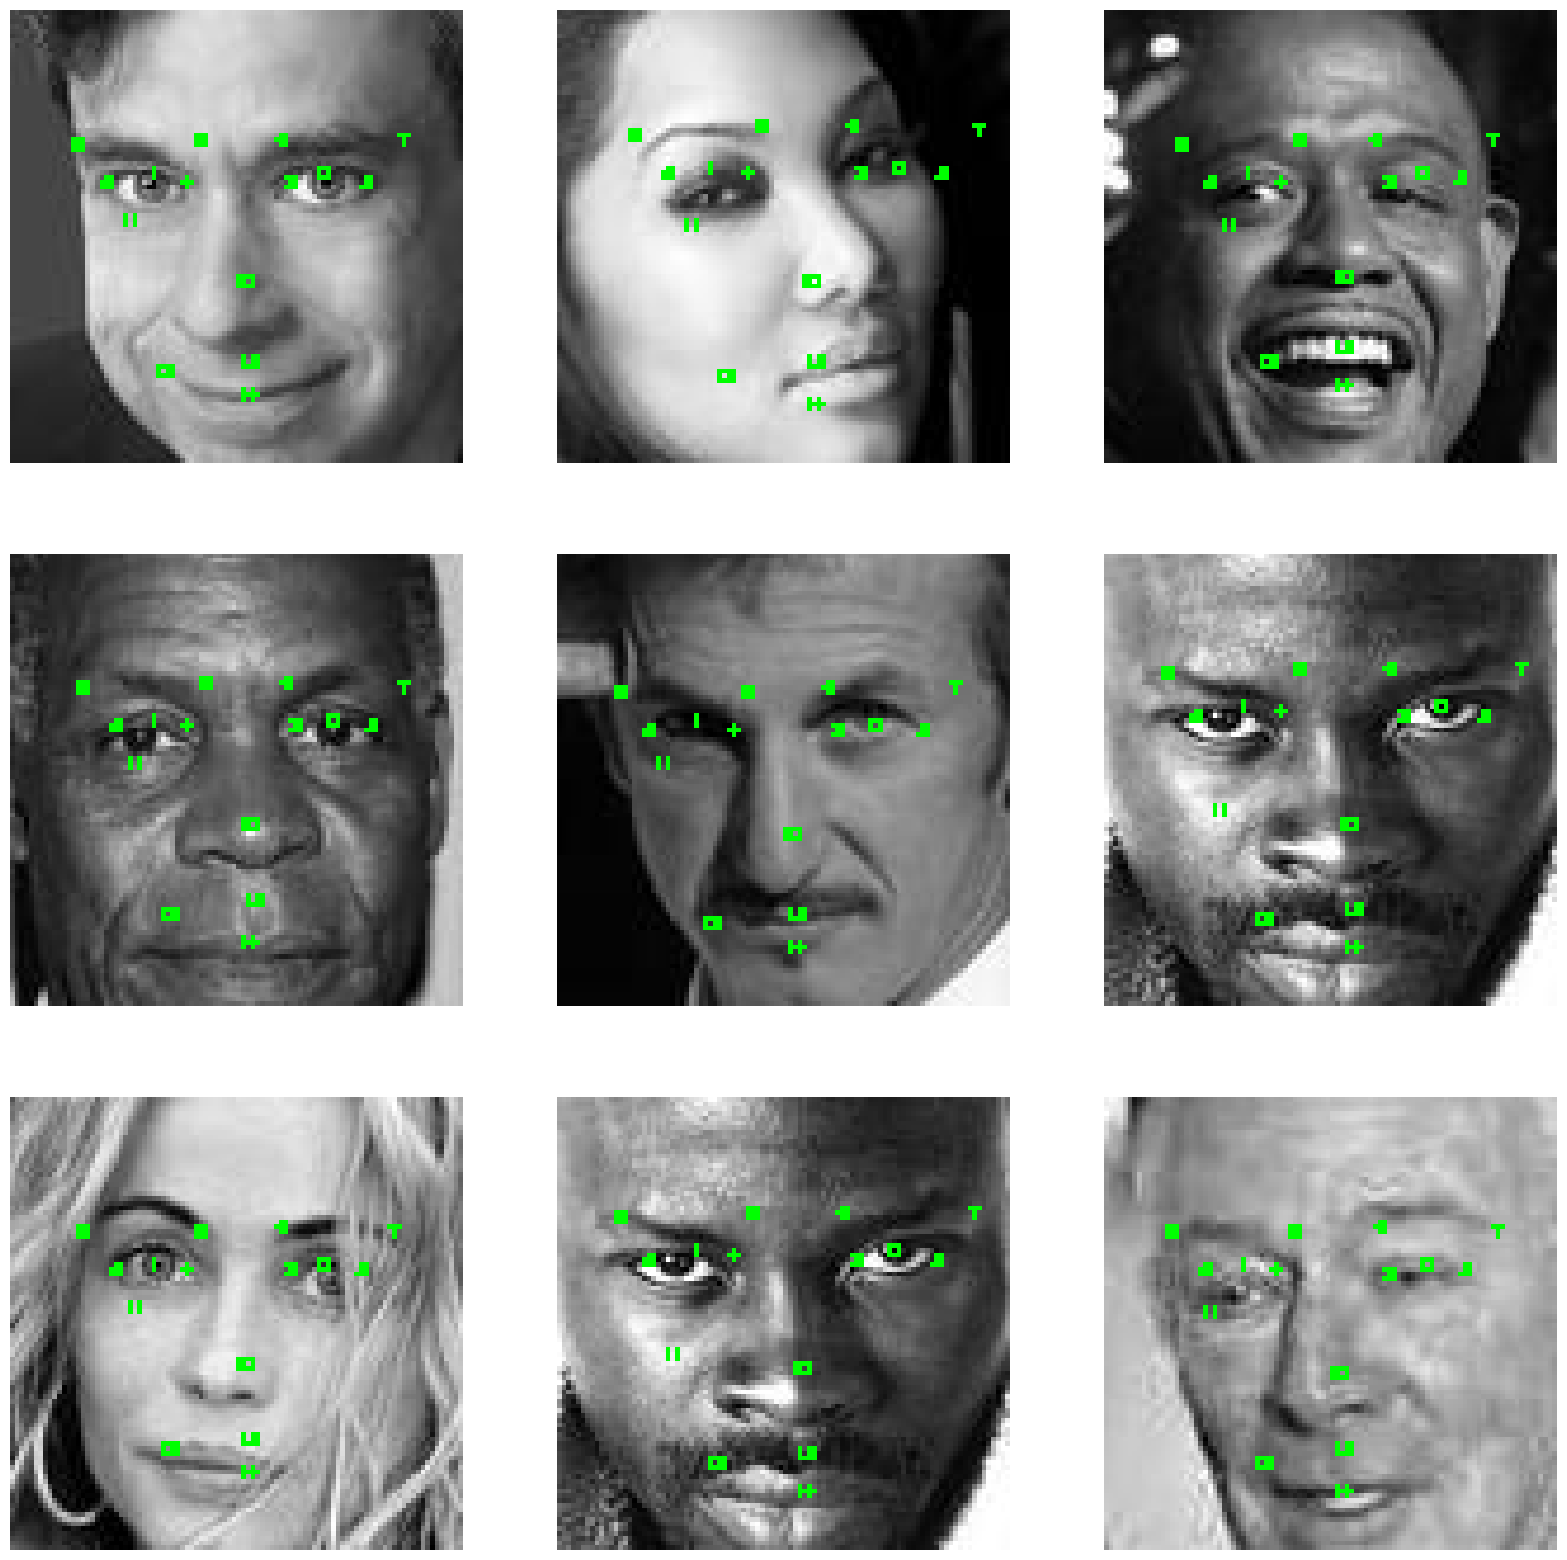

In [96]:
model_path = '/content/runs/pose/train3/weights/best.pt'
images_dir = '/content/datam/images/val/'
images = os.listdir(images_dir)

# Move model initialization outside the loop
model = YOLO(model_path)

plt.figure(figsize=(20, 20))
for plot_index in range(9):
    index = random.randint(0, len(images) - 1)
    image_path = os.path.join(images_dir, images[index])
    img = cv2.imread(image_path)

    results = model(image_path)[0]

    for result in results:
        for keypoint_indx, keypoint in enumerate(result.keypoints.data.tolist()[0]):
            cv2.putText(img, str(keypoint_indx), (int(keypoint[0]), int(keypoint[1])),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.1, (0, 255, 0), 1)

    plt.subplot(3, 3, plot_index + 1)
    plt.imshow(img)
    plt.axis('off')
